# Importing modules and data

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
from sklearn.inspection import permutation_importance

In [2]:
train_set_ind = pd.read_csv("../Downloads/train_set_ind.csv")
test_set_ind = pd.read_csv("../Downloads/test_set_ind.csv")
train_set_val = pd.read_csv("../Downloads/train_set_val.csv")
test_set_val = pd.read_csv("../Downloads/test_set_val.csv")

subset_013_ind = pd.read_csv("../Downloads/subset1_ind.csv")
subset_03_ind = pd.read_csv("../Downloads/subset2_ind.csv")
subset_3_ind = pd.read_csv("../Downloads/subset3_ind.csv")
subset_013_val = pd.read_csv("../Downloads/subset1_val.csv")
subset_03_val = pd.read_csv("../Downloads/subset2_val.csv")
subset_3_val = pd.read_csv("../Downloads/subset3_val.csv")

In [3]:
train_set_ind = train_set_ind.drop(['Unnamed: 0'], axis=1)
test_set_ind = test_set_ind.drop(['Unnamed: 0'], axis=1)
train_set_val = train_set_val.drop(['Unnamed: 0'], axis=1)
test_set_val = test_set_val.drop(['Unnamed: 0'], axis=1)

subset_013_ind = subset_013_ind.drop(['Unnamed: 0'], axis=1)
subset_03_ind = subset_03_ind.drop(['Unnamed: 0'], axis=1)
subset_3_ind = subset_3_ind.drop(['Unnamed: 0'], axis=1)
subset_013_val = subset_013_val.drop(['Unnamed: 0'], axis=1)
subset_03_val = subset_03_val.drop(['Unnamed: 0'], axis=1)
subset_3_val = subset_3_val.drop(['Unnamed: 0'], axis=1)

# Transform back to categorical

In [4]:
category_columns = ['sex', 'income', 'entrepreneur_freelancer', 
                     'entrepreneur_freelancer_alongside', 'one_person_business', 'income', 
                     'company_owner', 'partnership', 'partner_partnership', 
                     'private_limited_liability_company', 'other', 'none_work_situation', 
                     'early_retirement', 'zorgtoeslag', 'Ziektewetuitkering', 
                     'ANW', 'nabestaandenpensioen', 'orphan_pension', 'bijstand', 
                     'bijstand_zelfstandigen', 'IOAWIOAZ', 'WGA', 'invadility_pension', 
                     'kinderbijslag', 'none_benefit', 'income_realestate', 'student_grant', 
                     'student_loan', 'alimony_ex', 'alimony_children', 'study_allowance_parents', 
                     'allowence_family', 'dividend_stock_investment', 'interests', 
                     'none_sources', 'interest_loans', 'alimony_ex_paid', 'alimony_children_paid',
                     'parental_support_paid', 'parental_support_paid_other', 'support_gift_paid', 
                     'big_purchase', 'no_arrears', 'rent_mortgage_arrears',  
                     'general_utilities_arrear', 'other_arrears', 'months_arrears_rent', 
                     'months_arrears_general_utilities', 'partyvote', 'age_2', 'satisfaction_individual_2', 
                     'satisfaction_national_2', 'income_2', 
                     'gross_wages_amount_2', 'entrepreneur_freelancer_2', 
                     'entrepreneur_freelancer_alongside_2', 'one_person_business_2', 
                     'company_owner_2', 'partnership_2', 'partner_partnership_2', 
                     'private_limited_liability_company_2', 'other_2', 'none_work_situation_2', 
                     'zorgtoeslag_2', 'Ziektewetuitkering_2', 
                     'ANW_2', 'nabestaandenpensioen_2', 'bijstand_2', 
                     'bijstand_zelfstandigen_2', 'IOAWIOAZ_2', 'WGA_2', 'invadility_pension_2', 
                     'kinderbijslag_2', 'none_benefit_2', 'income_realestate_2', 'realestate_amount_2', 'student_grant_2', 
                     'amount_student_grant_2', 'student_loan_2', 'amount_student_loan_2', 'alimony_ex_2', 
                     'amount_alimony_ex_2', 
                     'alimony_children_2', 'amount_alimony_children_2', 'study_allowance_parents_2', 
                     'amount_study_allowance_parents_2', 
                     'allowence_family_2', 'amount_allowance_family_2', 'dividend_stock_investment_2', 
                     'amount_dividend_stock_investment_2',
                     'interests_2', 'amount_interests_2', 
                     'none_sources_2', 'interest_loans_2', 'amount_interest_loans_2', 'parental_support_paid_other_2', 
                     'support_gift_paid_2', 'amount_support_gift_paid_2',
                     'taxable_income_2', 'net_income_household_2', 'financial_situation_grade_2', 
                     'difficulty_life_grade_2', 'financial_situation_category_2', 'household_expenditure_2', 
                     'big_purchase_2', 'financial_situation_future_2', 'no_arrears_2', 
                     'rent_mortgage_arrears_2', 'amount_rent_mortgage_arrears_2', 'general_utilities_arrear_2', 
                     'amount_general_utilities_arrear_2',  
                     'other_arrears_2', 'amount_other_arrears_2', 'months_arrears_rent_2', 
                     'months_arrears_general_utilities_2']

In [5]:
for col in train_set_ind.columns:
    for i in category_columns:
        if col == i:
            train_set_ind[col] = train_set_ind[col].astype('category')

In [6]:
for col in test_set_ind.columns:
    for i in category_columns:
        if col == i:
            test_set_ind[col] = test_set_ind[col].astype('category')

In [7]:
for col in train_set_val.columns:
    for i in category_columns:
        if col == i:
            train_set_val[col] = train_set_val[col].astype('category')

In [8]:
for col in test_set_val.columns:
    for i in category_columns:
        if col == i:
            test_set_val[col] = test_set_val[col].astype('category')

In [9]:
for col in subset_013_ind.columns:
    for i in category_columns:
        if col == i:
            subset_013_ind[col] = subset_013_ind[col].astype('category')

In [10]:
for col in subset_03_ind.columns:
    for i in category_columns:
        if col == i:
            subset_03_ind[col] = subset_03_ind[col].astype('category')

In [11]:
for col in subset_3_ind.columns:
    for i in category_columns:
        if col == i:
            subset_3_ind[col] = subset_3_ind[col].astype('category')

In [12]:
for col in subset_013_val.columns:
    for i in category_columns:
        if col == i:
            subset_013_val[col] = subset_013_val[col].astype('category')

In [13]:
for col in subset_03_val.columns:
    for i in category_columns:
        if col == i:
            subset_03_val[col] = subset_03_val[col].astype('category')

In [14]:
for col in subset_3_val.columns:
    for i in category_columns:
        if col == i:
            subset_3_val[col] = subset_3_val[col].astype('category')

__splitting into dependent and independent variables__

_Individual:_

In [15]:
X_train_ind = train_set_ind.iloc[:, :-1].values
X_test_ind = test_set_ind.iloc[:, :-1].values
y_train_ind = train_set_ind.iloc[:,-1].values
y_test_ind = test_set_ind.iloc[:,-1].values

_Valence:_

In [16]:
X_train_val= train_set_val.iloc[:, :-1].values
X_test_val = test_set_val.iloc[:, :-1].values
y_train_val = train_set_val.iloc[:,-1].values
y_test_val = test_set_val.iloc[:,-1].values

_For smaller but more complete dataframes:_

In [17]:
X_subset_013_ind = subset_013_ind.iloc[:, :-1].values
y_subset_013_ind = subset_013_ind.iloc[:,-1].values
X_subset_013_val = subset_013_val.iloc[:, :-1].values
y_subset_013_val = subset_013_val.iloc[:,-1].values

In [18]:
X_subset_03_ind = subset_03_ind.iloc[:, :-1].values
y_subset_03_ind = subset_03_ind.iloc[:,-1].values
X_subset_03_val = subset_03_val.iloc[:, :-1].values
y_subset_03_val = subset_03_val.iloc[:,-1].values

In [19]:
X_subset_3_ind = subset_3_ind.iloc[:, :-1].values
y_subset_3_ind = subset_3_ind.iloc[:,-1].values
X_subset_3_val = subset_3_val.iloc[:, :-1].values
y_subset_3_val = subset_3_val.iloc[:,-1].values

&nbsp;

# Random Forest

In [20]:
def plot_confusion(y_true, y_pred):
    labels = unique_labels(y_true)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                        columns=column, index=indices)
    return table

In [21]:
def plot_feature_importance(df, model, num):
    features = df.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    num_features = num
    
    plt.figure(figsize=(16,16))
    plt.title('Feature importance', fontsize=23)
    plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]], fontsize=15)
    plt.xlabel('Relative importance', fontsize=15)
    return plt.show()

### All datapoints:

__individual__

In [22]:
np.random.seed(1908)
rf_clf1_ind = RandomForestClassifier(n_estimators=50, max_features='auto')
rf_clf2_ind = RandomForestClassifier(n_estimators=50, max_features='log2')
rf_clf3_ind = RandomForestClassifier(n_estimators=150, max_features='auto') 
rf_clf4_ind = RandomForestClassifier(n_estimators=150, max_features='log2') # best performance

In [23]:
rf_clf1_ind.fit(X_train_ind,y_train_ind) 
rf_clf2_ind.fit(X_train_ind,y_train_ind) 
rf_clf3_ind.fit(X_train_ind,y_train_ind) 
rf_clf4_ind.fit(X_train_ind,y_train_ind) # best performance

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='log2', n_estimators=150)

In [24]:
pred_ind_1 = rf_clf1_ind.predict(X_test_ind)
pred_ind_2 = rf_clf2_ind.predict(X_test_ind)
pred_ind_3 = rf_clf3_ind.predict(X_test_ind) 
pred_ind_4 = rf_clf4_ind.predict(X_test_ind) # best performance

_First:_

In [25]:
print(classification_report(y_test_ind, pred_ind_1, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.14      0.10      0.12       379
          CU       0.50      0.01      0.01       140
         D66       0.20      0.15      0.18       582
          GL       0.08      0.01      0.02       219
         PVV       0.18      0.16      0.17       301
        PvdA       0.16      0.16      0.16       327
        PvdD       1.00      0.00      0.00       172
         SGP       0.00      0.00      0.00        56
          SP       0.20      0.05      0.07       260
         VVD       0.24      0.71      0.36       781
       blank       1.00      0.00      0.00        13
       other       0.05      0.00      0.01       487

    accuracy                           0.21      3717
   macro avg       0.31      0.11      0.09      3717
weighted avg       0.22      0.21      0.15      3717



_Second:_

In [26]:
print(classification_report(y_test_ind, pred_ind_2, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.13      0.09      0.11       379
          CU       0.00      0.00      0.00       140
         D66       0.22      0.15      0.18       582
          GL       0.13      0.02      0.03       219
         PVV       0.20      0.12      0.15       301
        PvdA       0.15      0.21      0.18       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.14      0.05      0.08       260
         VVD       0.25      0.71      0.37       781
       blank       1.00      0.00      0.00        13
       other       0.13      0.01      0.03       487

    accuracy                           0.22      3717
   macro avg       0.36      0.11      0.09      3717
weighted avg       0.23      0.22      0.15      3717



_Third:_

In [27]:
print(classification_report(y_test_ind, pred_ind_3, zero_division=1)) 

              precision    recall  f1-score   support

         CDA       0.16      0.08      0.11       379
          CU       1.00      0.00      0.00       140
         D66       0.22      0.10      0.14       582
          GL       0.11      0.00      0.01       219
         PVV       0.18      0.18      0.18       301
        PvdA       0.15      0.08      0.11       327
        PvdD       1.00      0.00      0.00       172
         SGP       0.00      0.00      0.00        56
          SP       0.15      0.05      0.07       260
         VVD       0.23      0.79      0.36       781
       blank       1.00      0.00      0.00        13
       other       0.11      0.00      0.01       487

    accuracy                           0.22      3717
   macro avg       0.36      0.11      0.08      3717
weighted avg       0.25      0.22      0.14      3717



_Fourth:_

In [28]:
print(classification_report(y_test_ind, pred_ind_4, zero_division=1)) # best performance

              precision    recall  f1-score   support

         CDA       0.19      0.12      0.15       379
          CU       1.00      0.00      0.00       140
         D66       0.23      0.08      0.12       582
          GL       0.27      0.02      0.03       219
         PVV       0.21      0.15      0.17       301
        PvdA       0.14      0.14      0.14       327
        PvdD       1.00      0.00      0.00       172
         SGP       0.00      0.00      0.00        56
          SP       0.17      0.04      0.07       260
         VVD       0.24      0.81      0.37       781
       blank       1.00      0.00      0.00        13
       other       0.08      0.00      0.01       487

    accuracy                           0.22      3717
   macro avg       0.38      0.11      0.09      3717
weighted avg       0.26      0.22      0.15      3717



In [29]:
plot_confusion(y_test_ind, pred_ind_3)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,31,0,22,0,13,22,0,0,6,283,0,2
Actual CU,10,0,13,0,6,10,0,0,2,99,0,0
Actual D66,20,0,59,2,20,27,0,0,6,442,0,6
Actual GL,13,0,20,1,19,11,0,0,7,147,0,1
Actual PVV,21,0,9,0,54,10,0,1,13,192,0,1
Actual PvdA,20,0,14,2,31,27,0,0,5,227,0,1
Actual PvdD,12,0,11,0,15,7,0,0,7,119,0,1
Actual SGP,3,0,7,1,3,1,0,0,3,38,0,0
Actual SP,22,0,10,0,34,22,0,0,13,158,0,1
Actual VVD,27,0,57,0,34,30,0,0,10,619,0,4


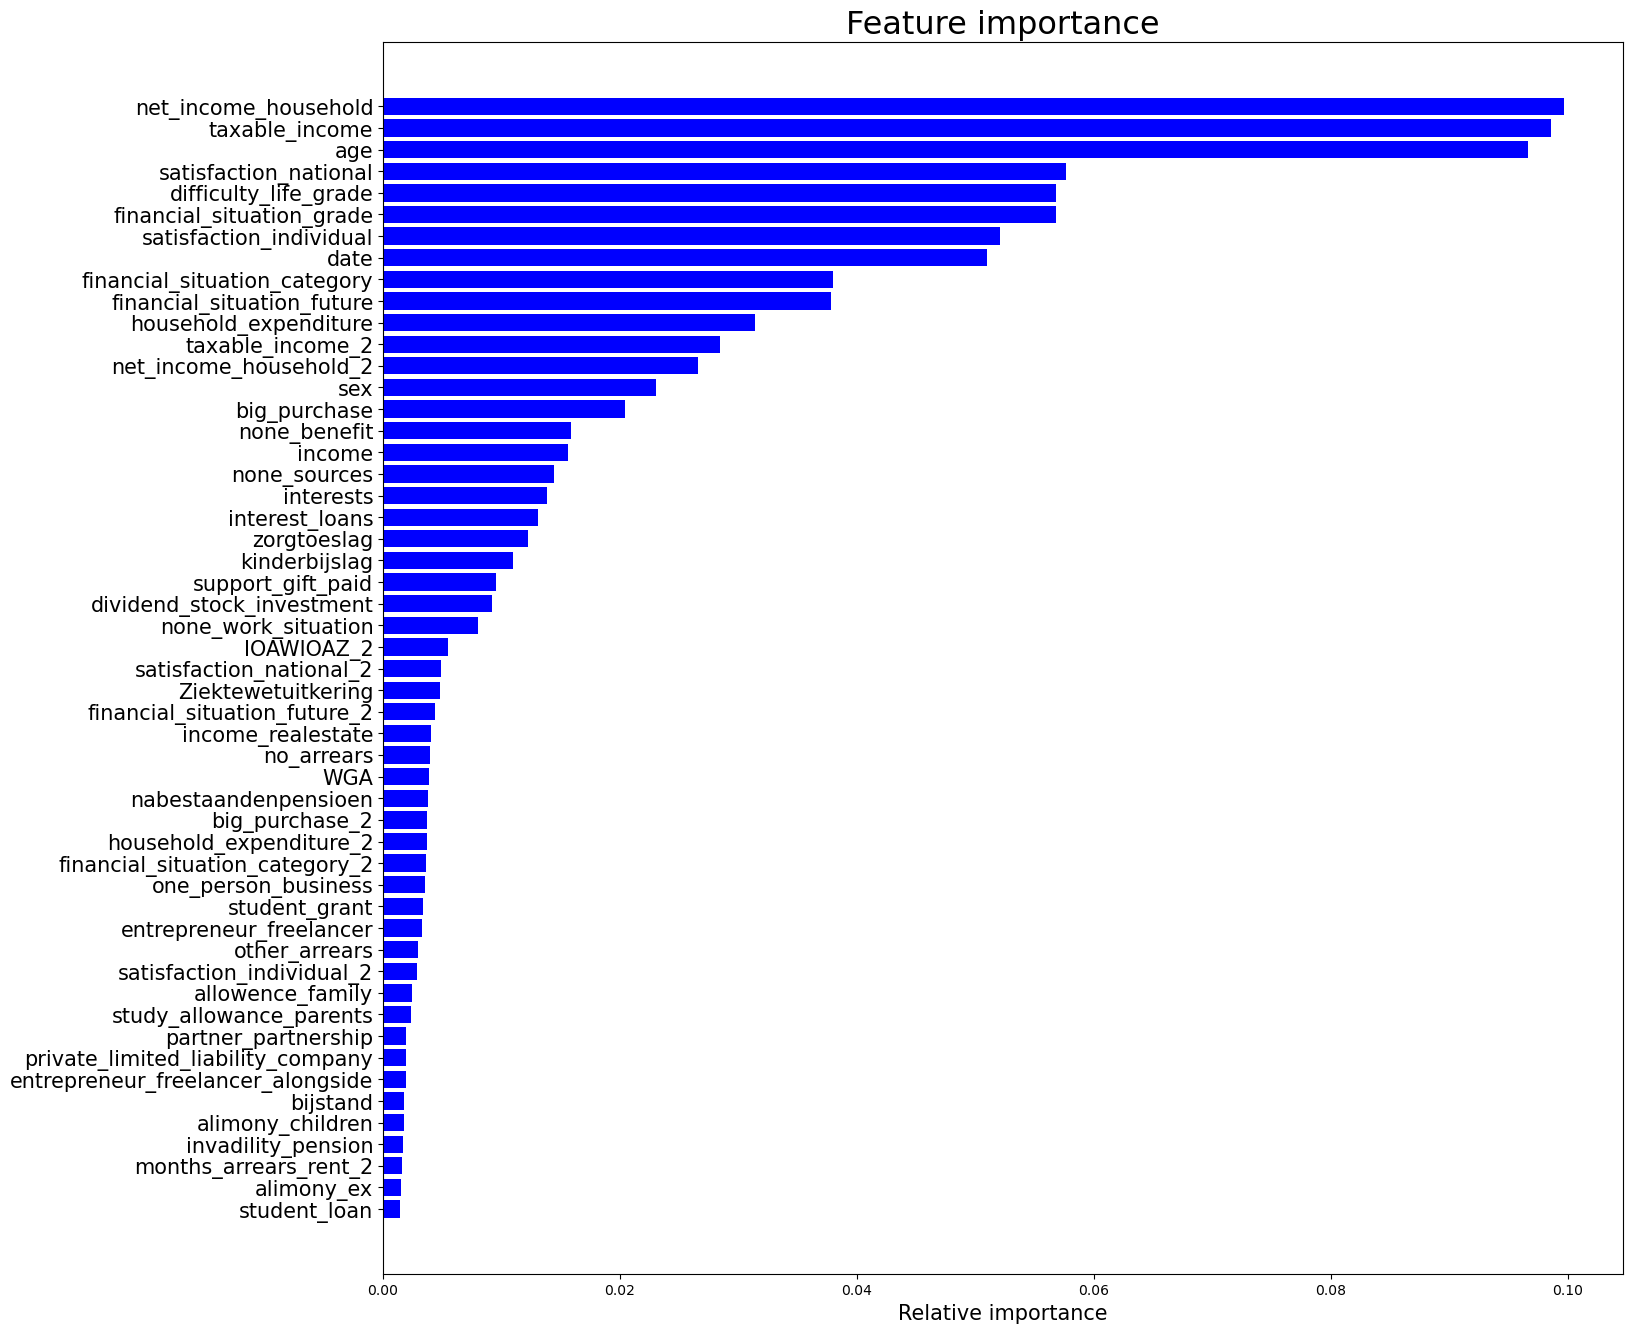

In [30]:
plot_feature_importance(train_set_ind, rf_clf3_ind, 52)

&nbsp;

__valence__

In [31]:
np.random.seed(1909)
rf_clf1_val = RandomForestClassifier(n_estimators=50, max_features='auto') 
rf_clf2_val = RandomForestClassifier(n_estimators=50, max_features='log2') 
rf_clf3_val = RandomForestClassifier(n_estimators=150, max_features='auto') # best performance
rf_clf4_val = RandomForestClassifier(n_estimators=150, max_features='log2')

In [32]:
rf_clf1_val.fit(X_train_val,y_train_val) 
rf_clf2_val.fit(X_train_val,y_train_val) 
rf_clf3_val.fit(X_train_val,y_train_val) # best performance
rf_clf4_val.fit(X_train_val,y_train_val) 

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='log2', n_estimators=150)

In [33]:
pred_val_1 = rf_clf1_val.predict(X_test_val) 
pred_val_2 = rf_clf2_val.predict(X_test_val)
pred_val_3 = rf_clf3_val.predict(X_test_val) # best performance
pred_val_4 = rf_clf4_val.predict(X_test_val)

_First:_

In [34]:
print(classification_report(y_test_ind, pred_val_1, zero_division=1)) 

              precision    recall  f1-score   support

         CDA       0.14      0.11      0.12       379
          CU       0.00      0.00      0.00       140
         D66       0.15      0.03      0.05       582
          GL       0.00      0.00      0.00       219
         PVV       0.14      0.02      0.03       301
        PvdA       0.12      0.14      0.13       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.11      0.02      0.03       260
         VVD       0.22      0.77      0.34       781
       blank       1.00      0.00      0.00        13
       other       0.00      0.00      0.00       487

    accuracy                           0.19      3717
   macro avg       0.32      0.09      0.06      3717
weighted avg       0.18      0.19      0.11      3717



_Second:_

In [35]:
print(classification_report(y_test_ind, pred_val_2, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.16      0.06      0.09       379
          CU       1.00      0.00      0.00       140
         D66       0.19      0.03      0.06       582
          GL       0.00      0.00      0.00       219
         PVV       0.20      0.03      0.05       301
        PvdA       0.11      0.15      0.13       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.14      0.03      0.05       260
         VVD       0.22      0.83      0.35       781
       blank       1.00      0.00      0.00        13
       other       0.00      0.00      0.00       487

    accuracy                           0.20      3717
   macro avg       0.42      0.10      0.06      3717
weighted avg       0.23      0.20      0.11      3717



In [36]:
plot_confusion(y_test_ind, pred_val_2)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,23,0,6,1,2,35,0,0,1,311,0,0
Actual CU,4,0,2,0,1,19,0,0,2,112,0,0
Actual D66,21,0,20,0,2,68,0,0,8,463,0,0
Actual GL,10,0,11,0,3,27,0,0,5,163,0,0
Actual PVV,10,0,8,0,9,54,0,0,4,215,0,1
Actual PvdA,16,0,12,1,3,50,0,0,3,242,0,0
Actual PvdD,4,0,4,0,4,38,0,0,1,121,0,0
Actual SGP,3,0,0,0,2,6,0,0,0,45,0,0
Actual SP,14,0,5,0,7,37,0,0,8,188,0,1
Actual VVD,25,0,15,1,3,78,0,0,9,650,0,0


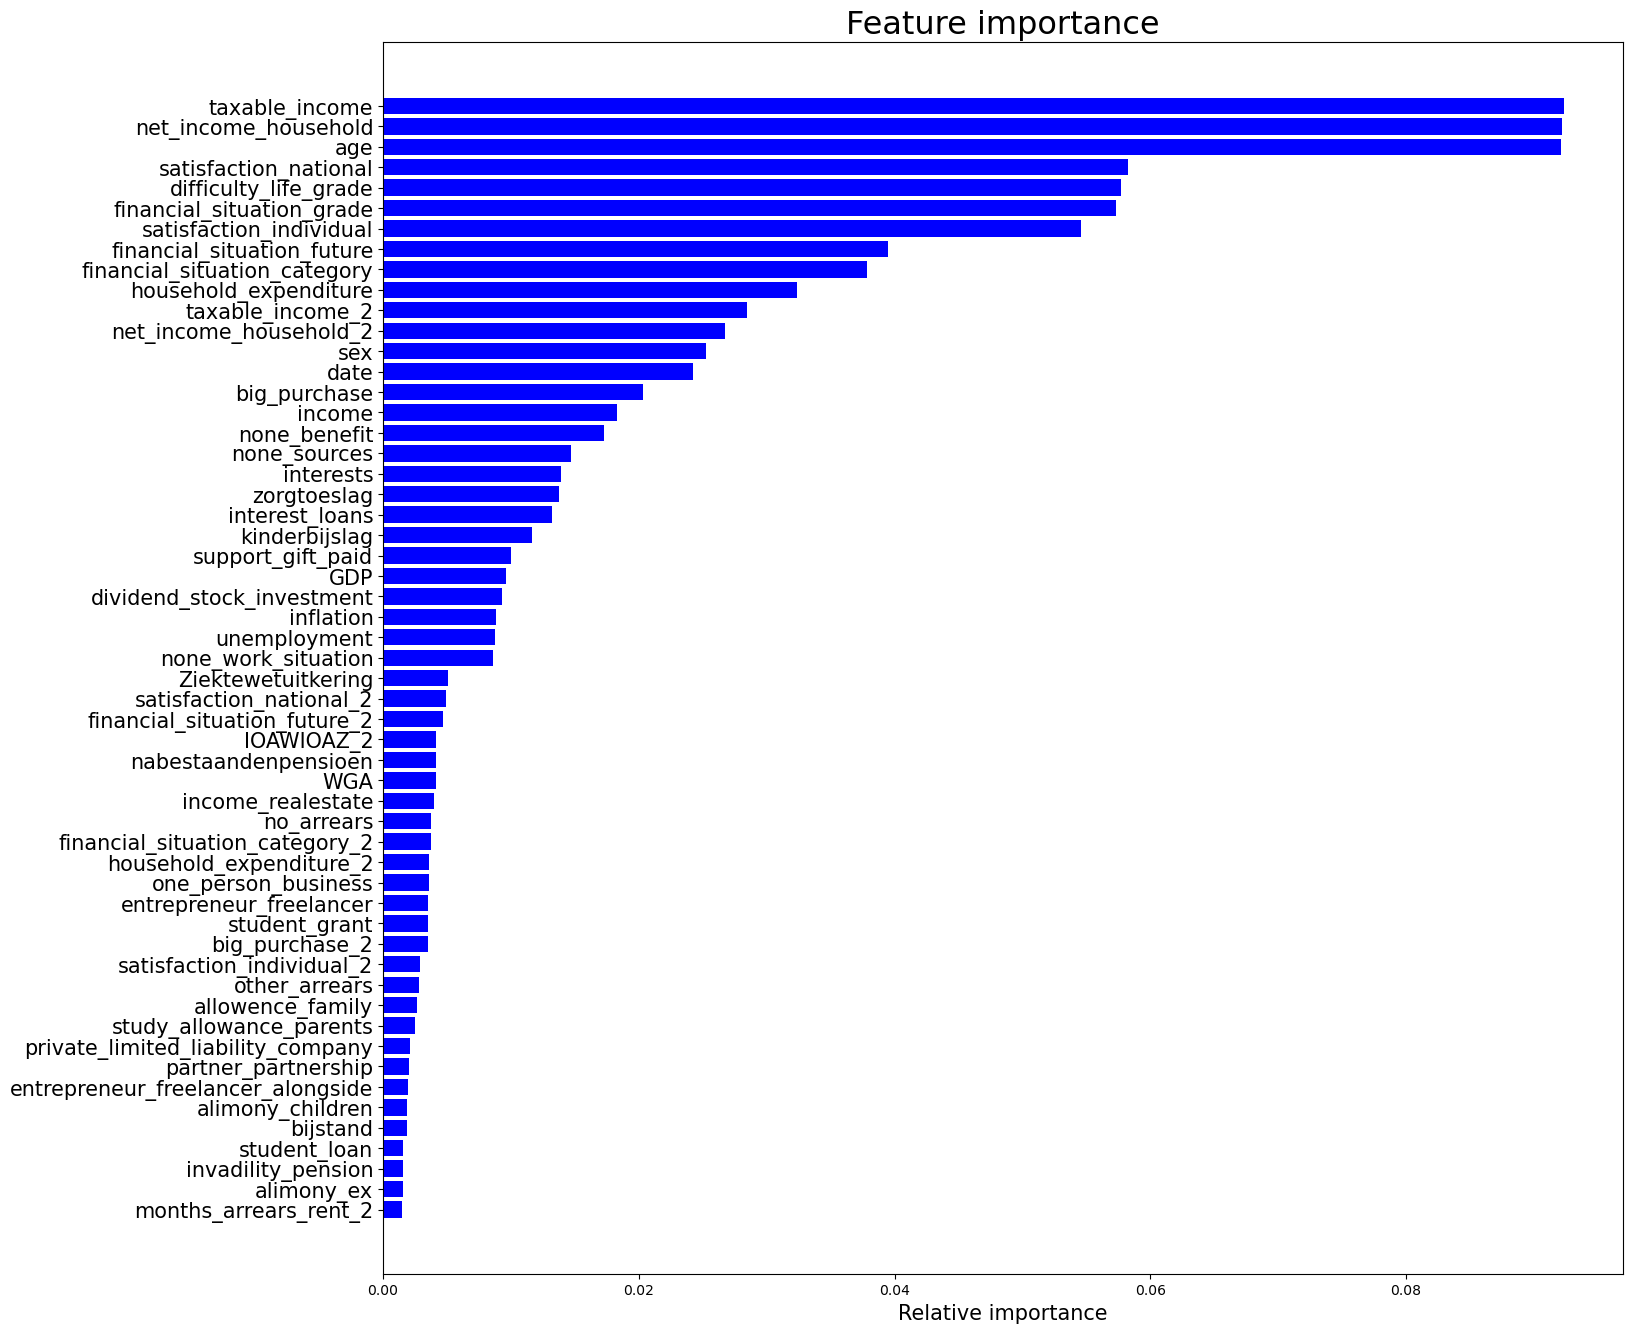

In [37]:
plot_feature_importance(train_set_val, rf_clf2_val, 55)

_Third:_

In [38]:
print(classification_report(y_test_ind, pred_val_3, zero_division=1))  # best performance

              precision    recall  f1-score   support

         CDA       0.12      0.04      0.07       379
          CU       1.00      0.00      0.00       140
         D66       0.18      0.04      0.06       582
          GL       0.00      0.00      0.00       219
         PVV       0.10      0.00      0.01       301
        PvdA       0.12      0.21      0.15       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.13      0.02      0.03       260
         VVD       0.23      0.85      0.36       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.21      3717
   macro avg       0.49      0.10      0.06      3717
weighted avg       0.35      0.21      0.11      3717



_Fourth:_

In [39]:
print(classification_report(y_test_ind, pred_val_4, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.15      0.02      0.04       379
          CU       1.00      0.00      0.00       140
         D66       0.23      0.02      0.04       582
          GL       0.00      0.00      0.00       219
         PVV       0.25      0.01      0.01       301
        PvdA       0.13      0.18      0.15       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.21      0.01      0.02       260
         VVD       0.22      0.88      0.35       781
       blank       1.00      0.00      0.00        13
       other       0.00      0.00      0.00       487

    accuracy                           0.21      3717
   macro avg       0.43      0.09      0.05      3717
weighted avg       0.25      0.21      0.10      3717



&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say" answers:

__Individual__

In [40]:
np.random.seed(1908)
rf_clf4_ind.fit(X_subset_013_ind,y_subset_013_ind)
pred_ind2 = rf_clf4_ind.predict(X_test_ind)

In [41]:
plot_confusion(y_test_ind, pred_ind2)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,58,0,22,0,7,26,0,0,2,259,0,5
Actual CU,12,0,6,1,3,9,0,0,1,105,0,3
Actual D66,38,0,49,5,19,36,1,0,7,422,0,5
Actual GL,19,0,21,1,12,16,0,0,4,145,0,1
Actual PVV,23,0,20,0,39,23,0,1,8,182,0,5
Actual PvdA,30,0,17,1,17,37,0,0,3,219,0,3
Actual PvdD,18,0,14,0,11,8,0,0,4,116,0,1
Actual SGP,3,0,6,0,3,2,0,0,1,41,0,0
Actual SP,29,0,7,0,24,31,0,0,12,152,0,5
Actual VVD,48,0,47,0,27,30,0,0,4,618,0,7


In [42]:
print(classification_report(y_test_ind, pred_ind2, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.19      0.15      0.17       379
          CU       1.00      0.00      0.00       140
         D66       0.19      0.08      0.12       582
          GL       0.11      0.00      0.01       219
         PVV       0.18      0.13      0.15       301
        PvdA       0.15      0.11      0.13       327
        PvdD       0.00      0.00      0.00       172
         SGP       0.00      0.00      0.00        56
          SP       0.19      0.05      0.07       260
         VVD       0.24      0.79      0.37       781
       blank       1.00      0.00      0.00        13
       other       0.08      0.01      0.01       487

    accuracy                           0.22      3717
   macro avg       0.28      0.11      0.09      3717
weighted avg       0.20      0.22      0.14      3717



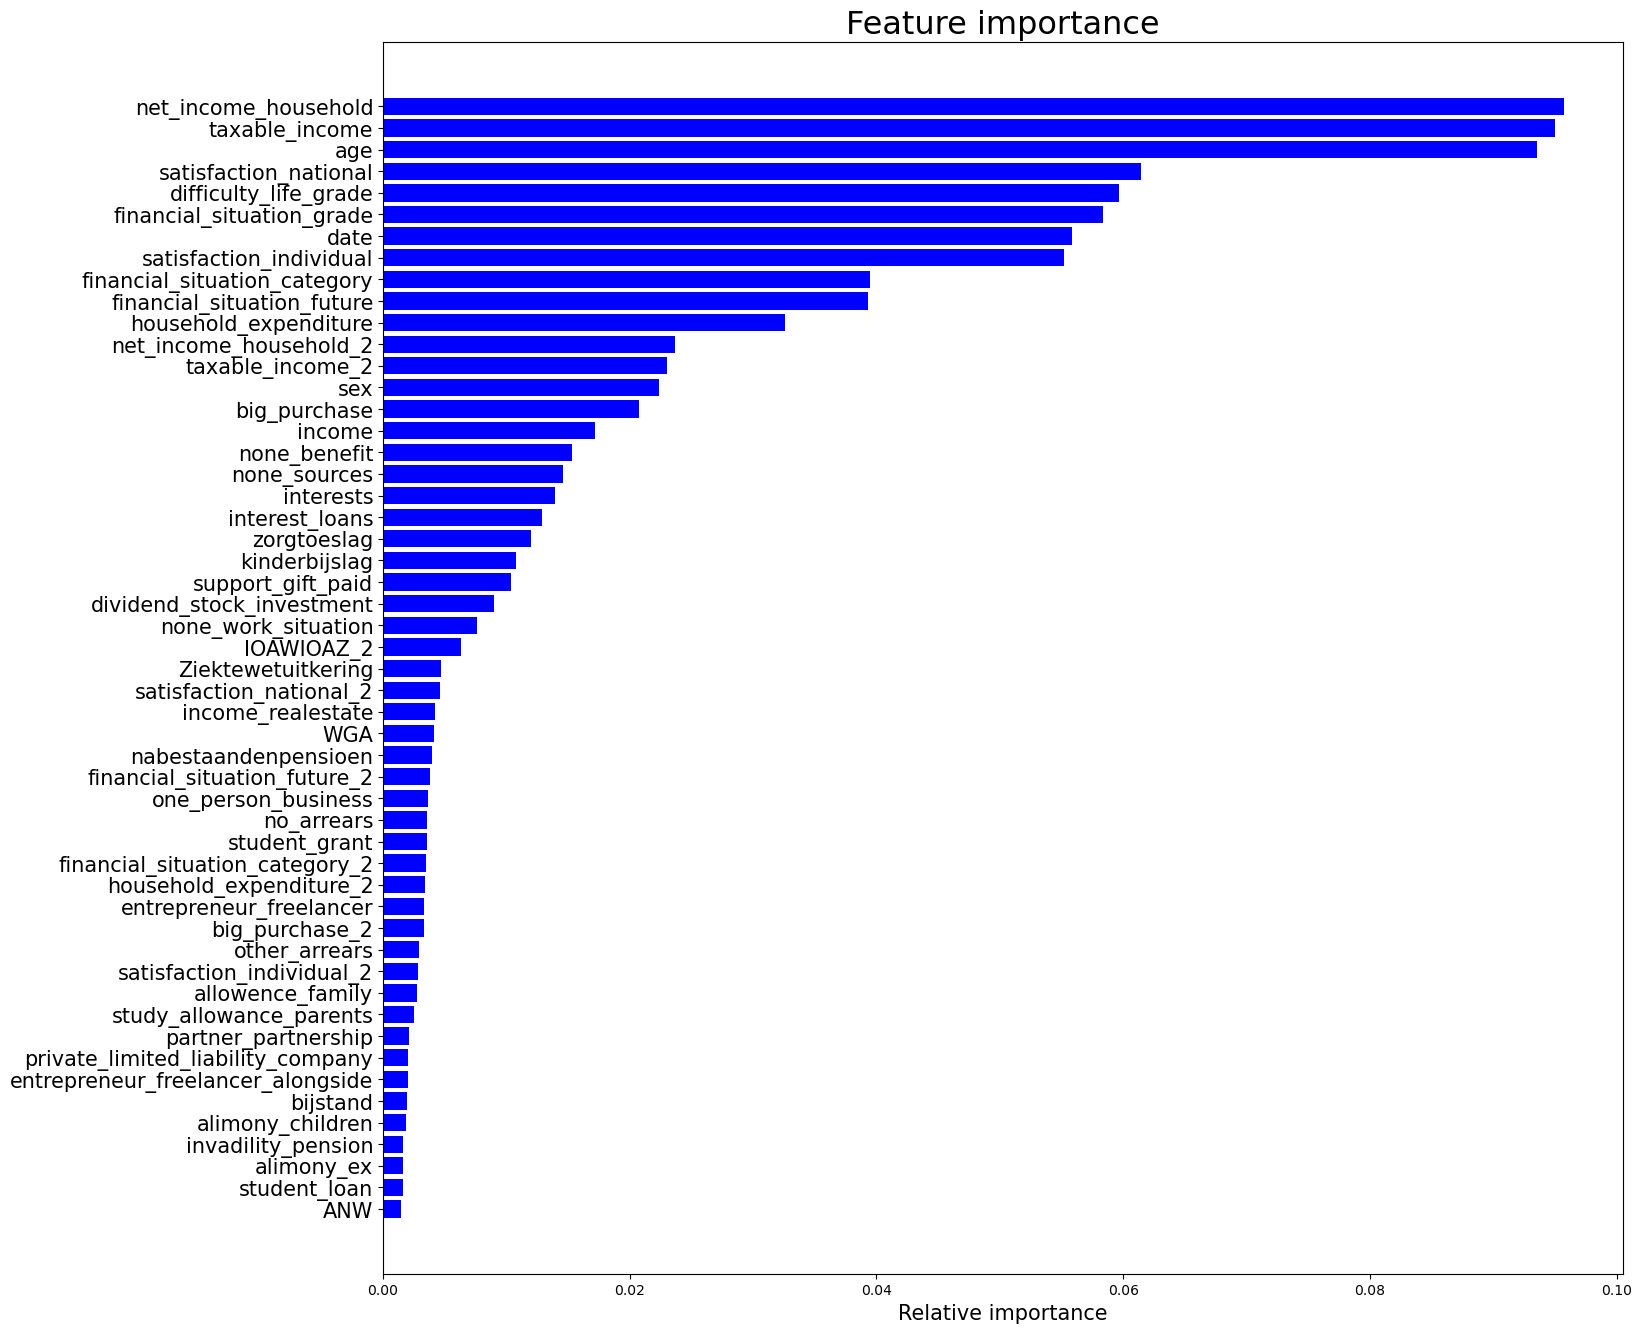

In [43]:
plot_feature_importance(subset_013_ind, rf_clf4_ind, 52)

&nbsp;

__Valence__

In [44]:
np.random.seed(1909)
rf_clf2_val.fit(X_subset_013_val,y_subset_013_val)
pred_val2 = rf_clf2_val.predict(X_test_val)

In [45]:
plot_confusion(y_test_val, pred_val2)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,28,0,6,0,2,43,0,0,0,300,0,0
Actual CU,12,0,2,0,1,21,0,0,0,104,0,0
Actual D66,24,0,17,0,1,66,0,0,9,465,0,0
Actual GL,12,0,7,0,2,26,0,0,4,168,0,0
Actual PVV,6,0,4,0,2,43,0,0,8,238,0,0
Actual PvdA,23,0,7,0,1,42,0,0,2,252,0,0
Actual PvdD,8,0,4,0,0,27,0,0,2,131,0,0
Actual SGP,3,0,2,0,0,1,0,0,2,48,0,0
Actual SP,18,0,2,0,1,52,0,0,7,180,0,0
Actual VVD,43,0,10,0,2,78,0,0,5,643,0,0


In [46]:
print(classification_report(y_test_val, pred_val2, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.15      0.07      0.10       379
          CU       1.00      0.00      0.00       140
         D66       0.20      0.03      0.05       582
          GL       1.00      0.00      0.00       219
         PVV       0.12      0.01      0.01       301
        PvdA       0.09      0.13      0.11       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.14      0.03      0.05       260
         VVD       0.22      0.82      0.35       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.20      3717
   macro avg       0.58      0.09      0.06      3717
weighted avg       0.41      0.20      0.10      3717



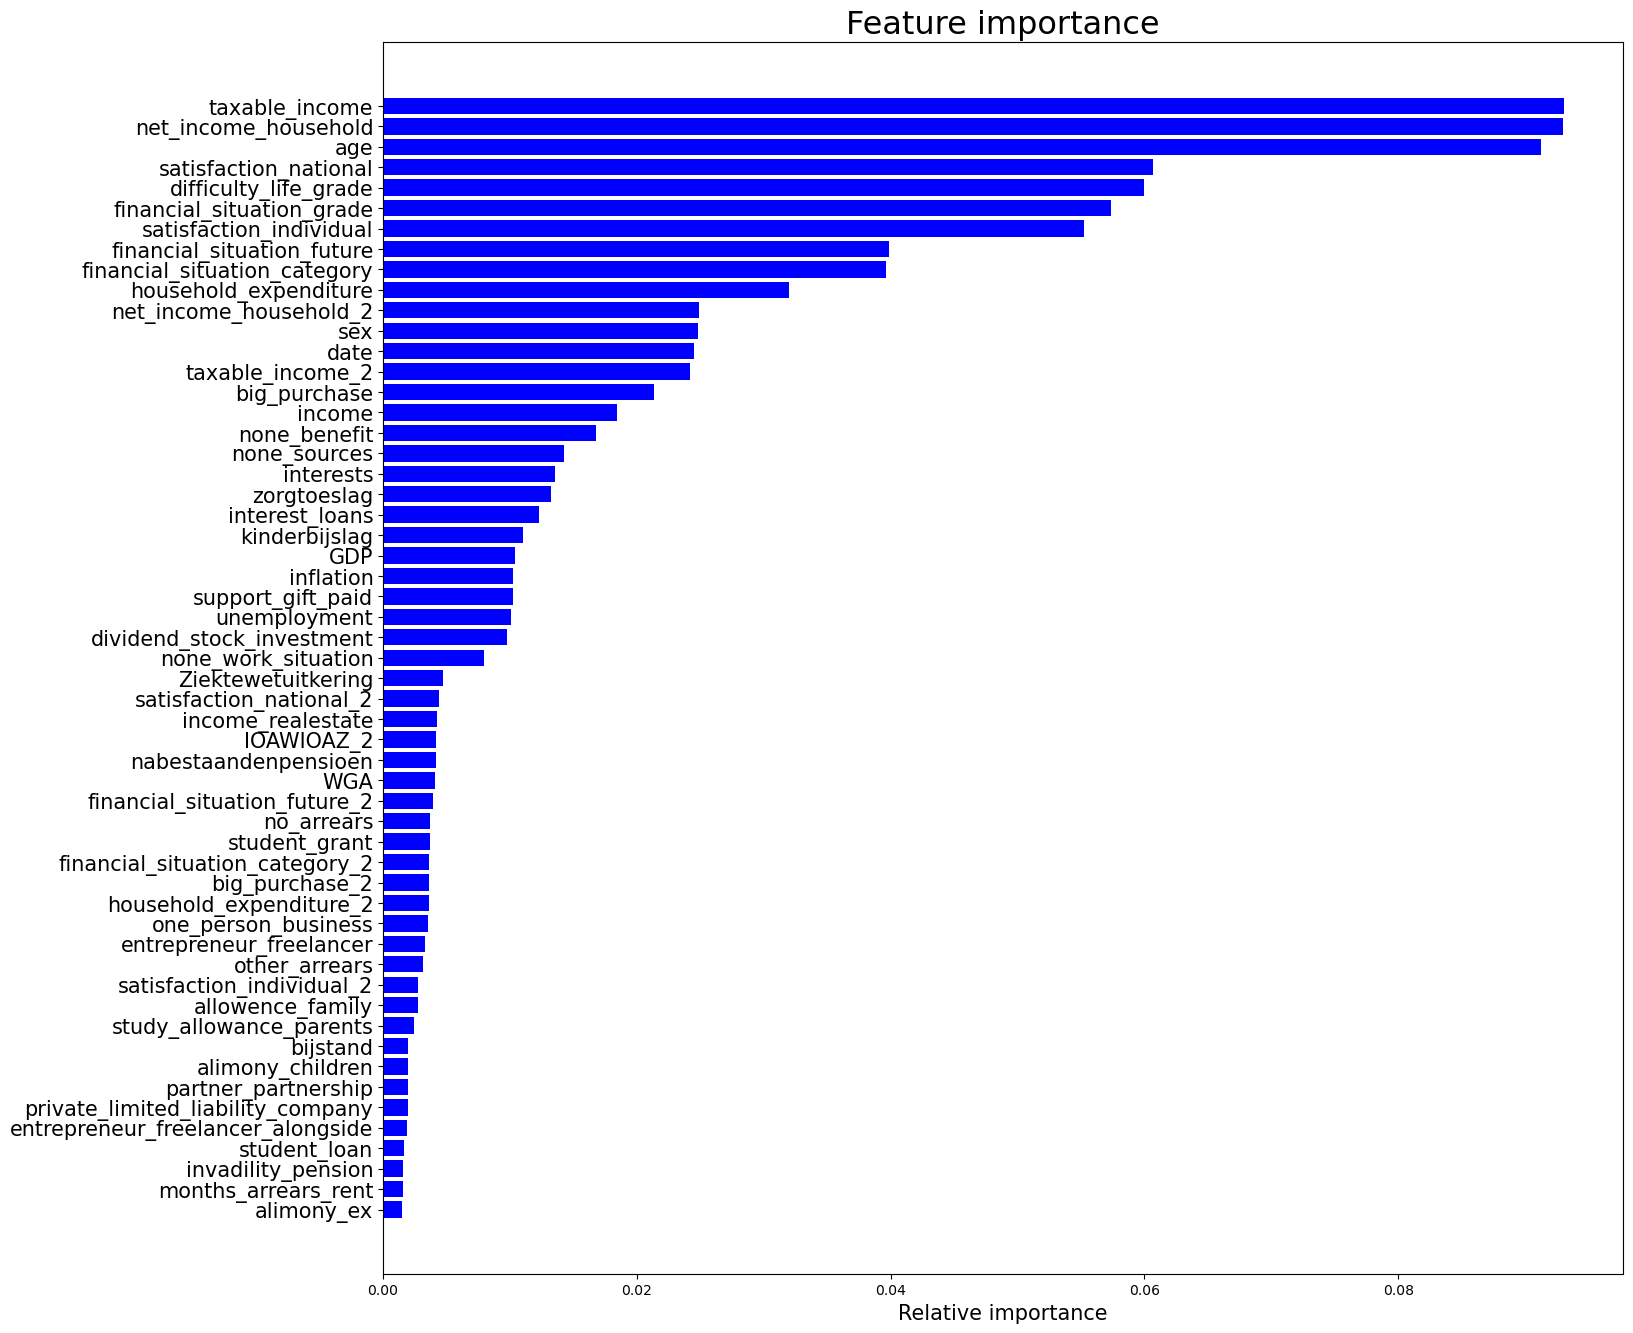

In [47]:
plot_feature_importance(subset_013_val, rf_clf2_val, 55)

&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say" & "I don't know" answers:

__Individual__

In [48]:
np.random.seed(1908)
rf_clf4_ind.fit(X_subset_03_ind,y_subset_03_ind)
pred_ind3 = rf_clf4_ind.predict(X_test_ind)

In [49]:
plot_confusion(y_test_ind, pred_ind3)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,27,0,20,0,7,41,0,0,2,282,0,0
Actual CU,11,0,9,0,2,13,0,0,0,105,0,0
Actual D66,28,0,64,0,6,67,1,0,6,410,0,0
Actual GL,8,0,21,0,5,26,0,0,3,156,0,0
Actual PVV,10,0,11,0,18,37,0,1,2,222,0,0
Actual PvdA,20,0,19,0,5,62,0,0,5,216,0,0
Actual PvdD,8,0,13,0,5,21,0,0,2,123,0,0
Actual SGP,3,0,10,0,0,7,0,0,0,36,0,0
Actual SP,24,0,15,0,11,34,0,0,4,171,0,1
Actual VVD,23,0,36,0,12,71,0,0,3,636,0,0


In [50]:
print(classification_report(y_test_ind, pred_ind3, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.15      0.07      0.10       379
          CU       1.00      0.00      0.00       140
         D66       0.23      0.11      0.15       582
          GL       1.00      0.00      0.00       219
         PVV       0.20      0.06      0.09       301
        PvdA       0.15      0.19      0.17       327
        PvdD       0.00      0.00      0.00       172
         SGP       0.00      0.00      0.00        56
          SP       0.13      0.02      0.03       260
         VVD       0.23      0.81      0.36       781
       blank       1.00      0.00      0.00        13
       other       0.00      0.00      0.00       487

    accuracy                           0.22      3717
   macro avg       0.34      0.11      0.07      3717
weighted avg       0.24      0.22      0.13      3717



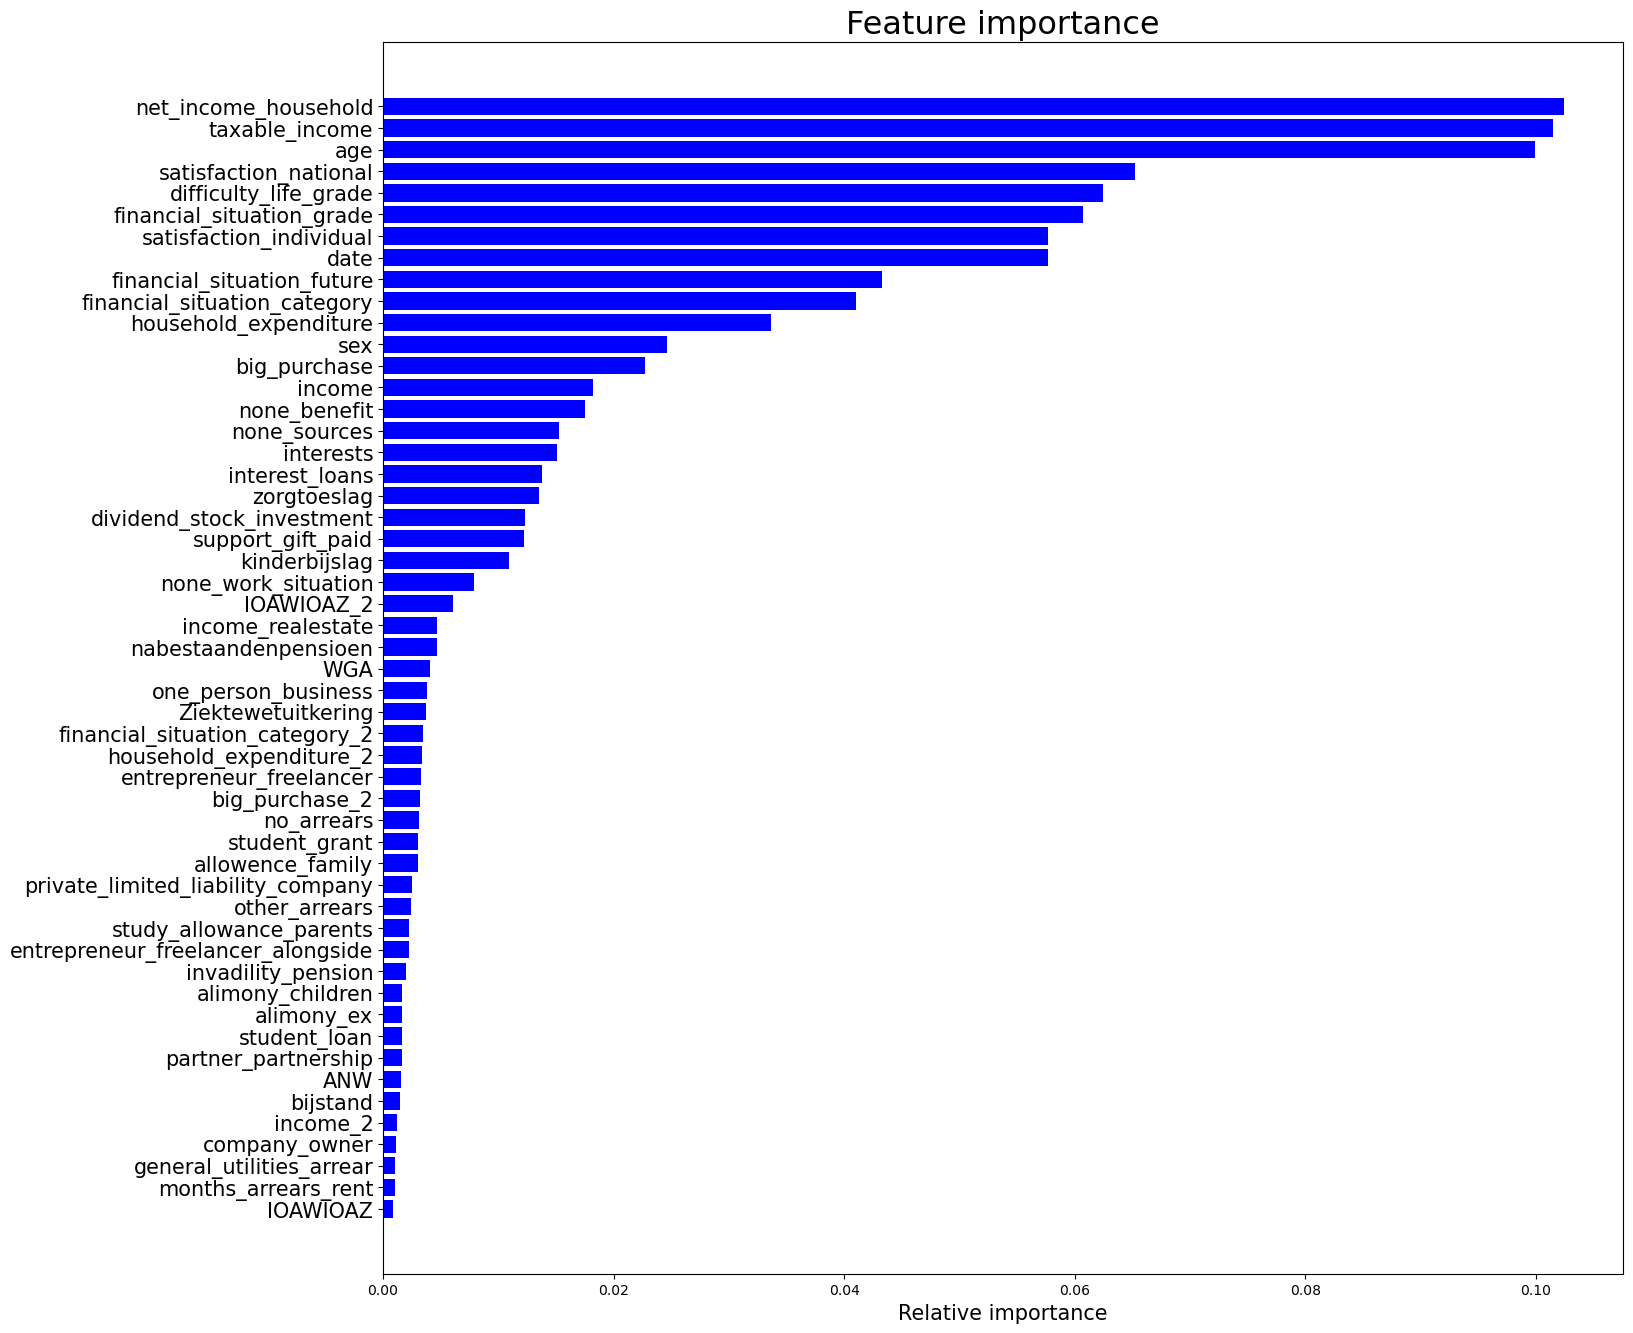

In [51]:
plot_feature_importance(subset_03_ind, rf_clf4_ind, 52)

&nbsp;

__Valence__

In [52]:
np.random.seed(1909)
rf_clf2_val.fit(X_subset_03_val,y_subset_03_val)
pred_val3 = rf_clf2_val.predict(X_test_val)

In [53]:
plot_confusion(y_test_val, pred_val3)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,33,0,8,0,0,77,0,0,0,260,0,1
Actual CU,6,0,9,0,0,25,0,0,0,100,0,0
Actual D66,25,0,39,1,1,93,0,0,5,418,0,0
Actual GL,11,0,12,1,3,45,0,0,2,145,0,0
Actual PVV,10,0,10,0,8,62,0,0,9,202,0,0
Actual PvdA,26,0,13,0,0,91,0,0,3,194,0,0
Actual PvdD,10,0,6,1,2,24,0,0,1,128,0,0
Actual SGP,1,0,1,0,0,15,0,0,0,39,0,0
Actual SP,22,0,2,0,5,66,0,0,6,159,0,0
Actual VVD,36,0,21,2,2,126,0,0,2,592,0,0


In [54]:
print(classification_report(y_test_val, pred_val3, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.17      0.09      0.11       379
          CU       1.00      0.00      0.00       140
         D66       0.27      0.07      0.11       582
          GL       0.20      0.00      0.01       219
         PVV       0.30      0.03      0.05       301
        PvdA       0.13      0.28      0.18       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.15      0.02      0.04       260
         VVD       0.23      0.76      0.35       781
       blank       1.00      0.00      0.00        13
       other       0.00      0.00      0.00       487

    accuracy                           0.21      3717
   macro avg       0.45      0.10      0.07      3717
weighted avg       0.27      0.21      0.12      3717



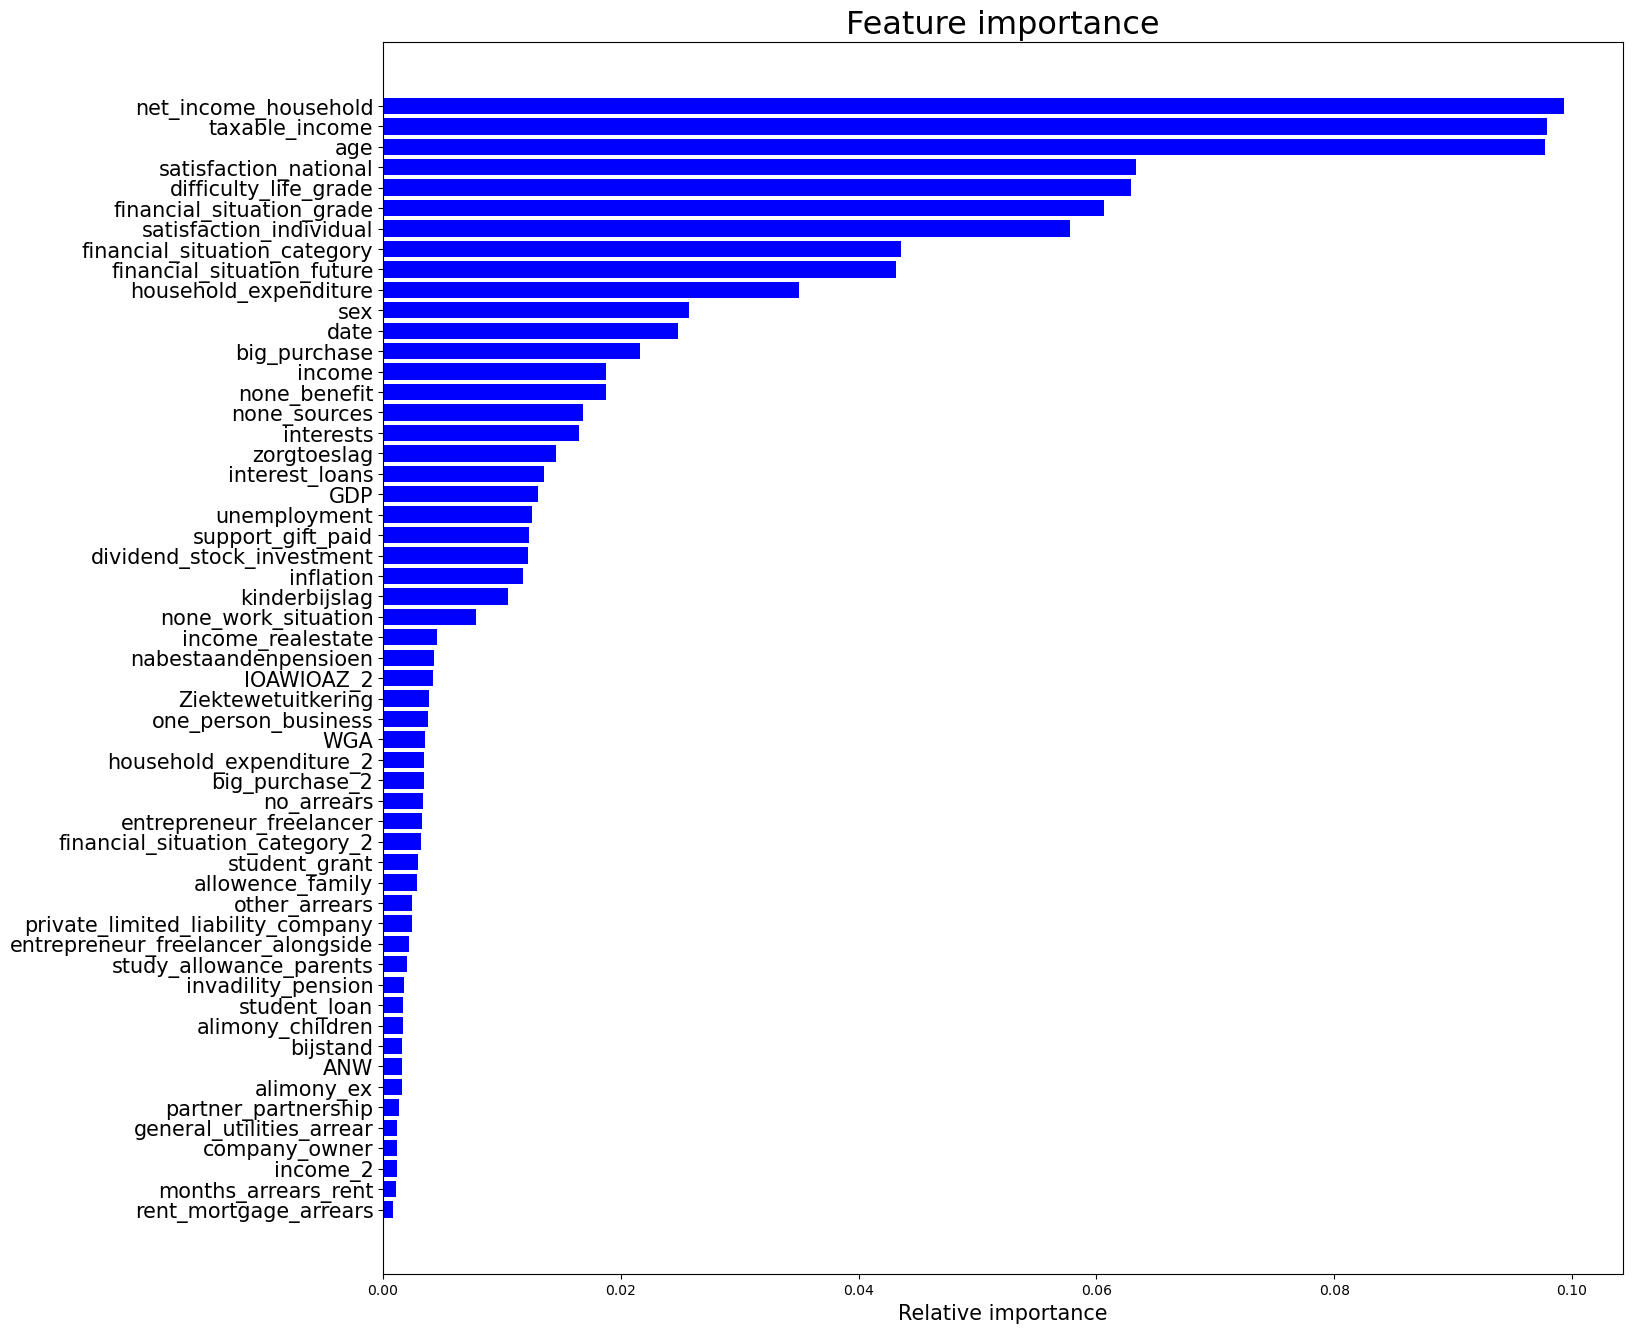

In [55]:
plot_feature_importance(subset_03_val, rf_clf2_val, 55)

&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say", "I don't know" & NaN answers:

__Individual__

In [56]:
np.random.seed(1908)
rf_clf4_ind.fit(X_subset_3_ind,y_subset_3_ind)
pred_ind4 = rf_clf4_ind.predict(X_test_ind)

In [57]:
plot_confusion(y_test_ind, pred_ind4)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,46,0,1,0,8,76,0,0,3,245,0,0
Actual CU,17,0,3,0,3,24,0,0,1,92,0,0
Actual D66,39,0,10,1,5,96,0,0,8,423,0,0
Actual GL,16,0,2,0,4,35,0,0,9,153,0,0
Actual PVV,30,0,0,0,14,49,0,0,13,195,0,0
Actual PvdA,35,0,2,0,4,89,0,0,10,187,0,0
Actual PvdD,14,0,2,0,2,34,0,0,3,117,0,0
Actual SGP,3,0,0,0,0,7,0,0,1,45,0,0
Actual SP,38,0,1,2,10,44,0,0,12,153,0,0
Actual VVD,53,0,2,1,13,103,0,1,10,598,0,0


In [58]:
print(classification_report(y_test_ind, pred_ind4, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.14      0.12      0.13       379
          CU       1.00      0.00      0.00       140
         D66       0.42      0.02      0.03       582
          GL       0.00      0.00      0.00       219
         PVV       0.18      0.05      0.07       301
        PvdA       0.14      0.27      0.19       327
        PvdD       1.00      0.00      0.00       172
         SGP       0.00      0.00      0.00        56
          SP       0.14      0.05      0.07       260
         VVD       0.23      0.77      0.36       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.21      3717
   macro avg       0.44      0.11      0.07      3717
weighted avg       0.38      0.21      0.12      3717



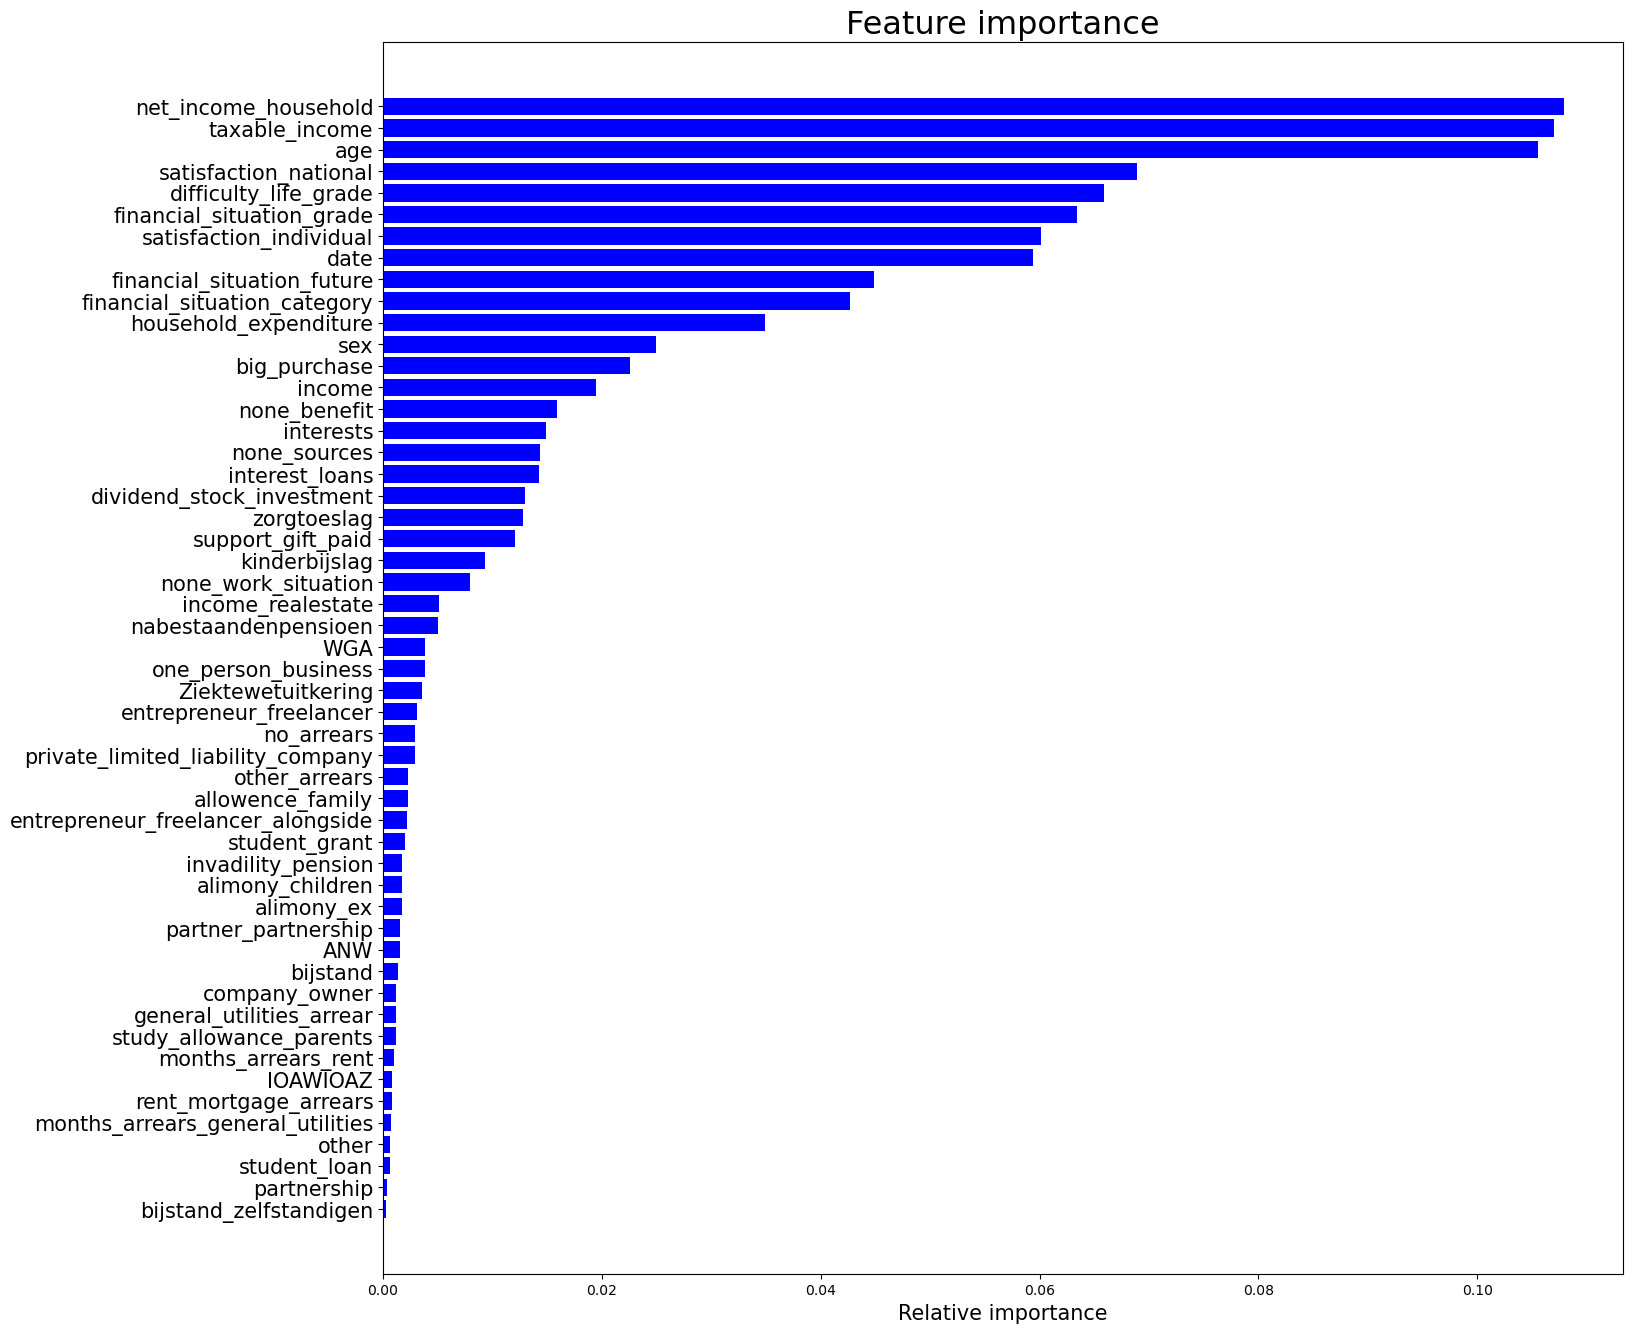

In [59]:
plot_feature_importance(subset_3_ind, rf_clf4_ind, 52)

&nbsp;

__Valence__

In [60]:
np.random.seed(1909)
rf_clf2_val.fit(X_subset_3_val,y_subset_3_val)
pred_val4 = rf_clf2_val.predict(X_test_val)

In [61]:
plot_confusion(y_test_val, pred_val4)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,10,1,4,0,0,51,0,0,0,313,0,0
Actual CU,3,0,0,0,0,15,1,0,0,121,0,0
Actual D66,5,0,9,0,5,69,0,0,2,492,0,0
Actual GL,5,0,3,0,0,35,0,0,2,174,0,0
Actual PVV,3,0,2,0,5,49,0,0,0,242,0,0
Actual PvdA,8,0,1,0,1,56,0,0,2,259,0,0
Actual PvdD,3,0,1,0,0,24,0,0,0,144,0,0
Actual SGP,3,0,0,0,0,7,0,0,0,46,0,0
Actual SP,4,0,2,0,4,24,0,0,2,224,0,0
Actual VVD,3,0,6,1,2,86,1,0,3,679,0,0


In [62]:
print(classification_report(y_test_val, pred_val4, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.19      0.03      0.05       379
          CU       0.00      0.00      0.00       140
         D66       0.29      0.02      0.03       582
          GL       0.00      0.00      0.00       219
         PVV       0.25      0.02      0.03       301
        PvdA       0.12      0.17      0.14       327
        PvdD       0.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.14      0.01      0.01       260
         VVD       0.22      0.87      0.35       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.20      3717
   macro avg       0.35      0.09      0.05      3717
weighted avg       0.30      0.20      0.10      3717



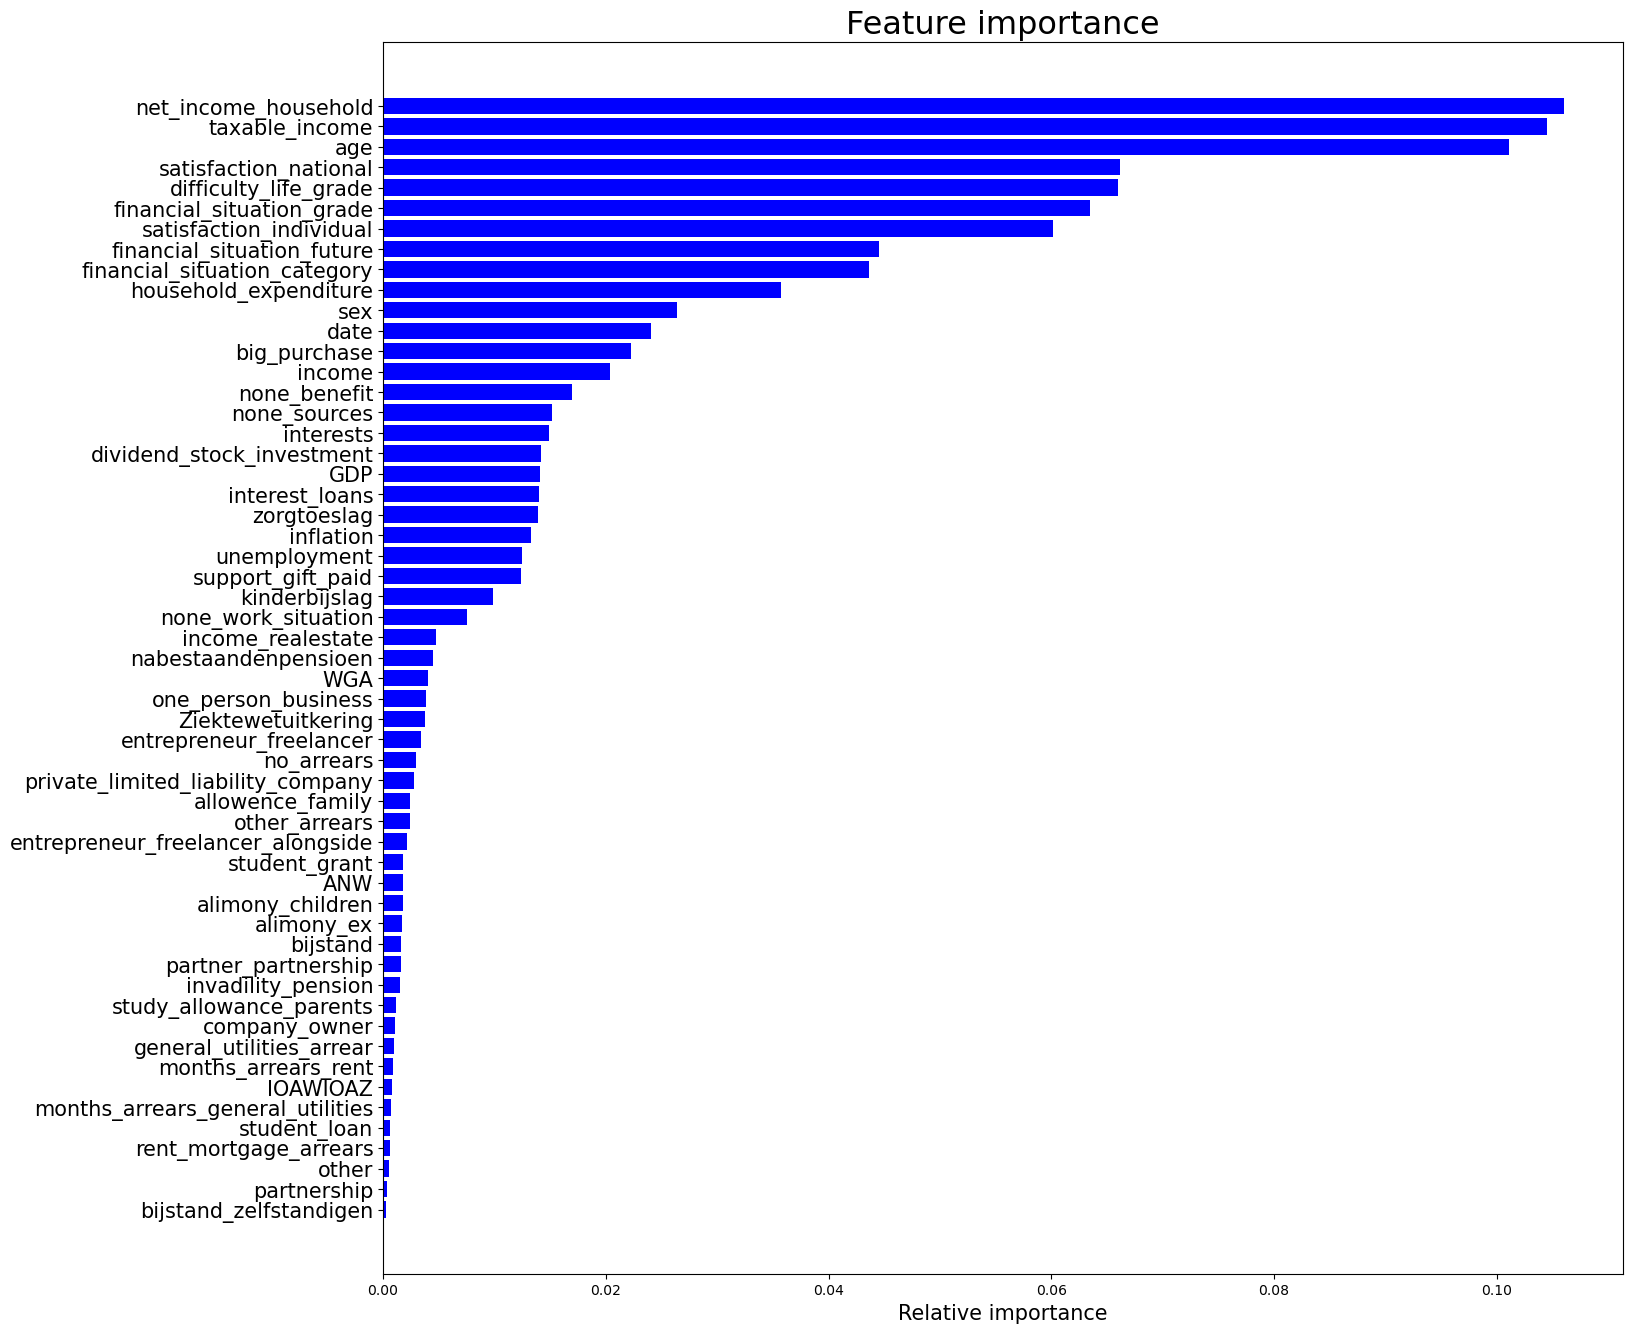

In [63]:
plot_feature_importance(subset_3_val, rf_clf2_val, 55)